In [2]:
#https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook
#Comment formater un cahier
#https://www.geeksforgeeks.org/jupyter-notebook-tips-and-tricks/
#Comment mettre des commentaires

In [2]:
# Importer des bibliothèques nécessaires

#numérique
import numpy as np

#maniupulation des données
import pandas as pd

#généner des graphiques
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import cm

In [4]:
#importer les données de la chaleure spécifique
C = np.loadtxt('Cp.txt', delimiter="\t")

#et inspecter les données
print(C)

[[ 2.95209  5.43093]
 [ 3.0264   5.58161]
 [ 3.30126  6.15095]
 [ 3.47659  6.47909]
 [ 3.64831  6.81327]
 [ 3.82966  7.1271 ]
 [ 4.0062   7.43789]
 [ 4.17537  7.73674]
 [ 4.35388  8.02791]
 [ 4.53474  8.33192]
 [ 4.7165   8.61388]
 [ 4.89728  8.92063]
 [ 5.07513  9.21729]
 [ 5.2586   9.52272]
 [ 5.44078  9.8425 ]
 [ 5.62495 10.17558]
 [ 5.80799 10.52671]
 [ 5.98994 10.90833]
 [ 6.17307 11.29632]
 [ 6.35667 11.71386]
 [ 6.53995 12.15546]
 [ 6.72528 12.64176]
 [ 6.9101  13.13743]
 [ 7.10235 13.68495]
 [ 7.30842 14.3749 ]
 [ 7.49444 15.05263]
 [ 7.67839 15.77377]
 [ 7.86576 16.58826]
 [ 8.05243 17.56559]
 [ 8.23839 18.68215]
 [ 8.42476 20.04692]
 [ 8.61242 22.10613]
 [ 8.8092  27.33226]
 [ 8.99528 13.61473]
 [ 9.14474 11.08234]
 [ 9.33239  9.38938]
 [ 9.5186   8.31878]
 [ 9.70385  7.5619 ]
 [ 9.89169  6.99973]
 [10.07615  6.54718]
 [10.2635   6.17794]
 [10.4458   5.89614]
 [10.63055  5.65662]
 [10.81432  5.46746]
 [11.00716  5.30073]
 [11.18899  5.17638]
 [11.37864  5.07071]
 [11.56046  4

In [5]:
#extraire deux vecteurs
T=C[:,0]
Cp=C[:,1]

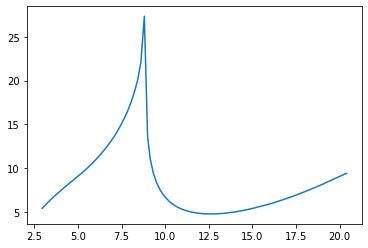

In [6]:
plt.plot(T, Cp)
plt.show()

In [7]:
#La théorie predit un chaleur spécifique avec deux contributions
#Cp=gT+bT^3, donc pour avoir une ligne droite nous devons reformuler les données:
#Cp/T=g+bT^2
T2=T*T
CpdivT=Cp/T

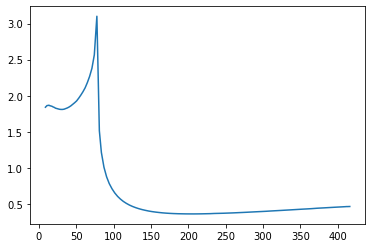

In [8]:
#inspecter les données transformées
plt.plot(T2, CpdivT)
plt.show()

In [9]:
#selectionner la bonne section en températures
#https://docs.scipy.org/doc/numpy-1.5.x/reference/arrays.indexing.html
hot_T2 = T2[T2 > 250]
print('hot_T2',len(hot_T2))
print(hot_T2)

hot_T2 28
[253.42443088 259.59138819 265.71673267 271.9019613  278.20705461
 284.63941399 290.98866939 297.57561014 304.1529024  310.71148154
 317.45404122 324.16670144 330.83135411 337.28130565 343.72381324
 351.30042386 358.73420648 365.33620361 373.17546506 381.21781504
 388.72696515 396.43398342 404.36906574 410.35982388 411.59036554
 412.05833261 412.25728897 416.15061605]


In [10]:
last=len(T2)
print('last',last)
l_hot_T2=len(hot_T2)
beg=last-l_hot_T2
print('beg',beg)
hot_CpdivT=CpdivT[beg:]
print('hot_CpdivT',len(hot_CpdivT))

last 98
beg 70
hot_CpdivT 28


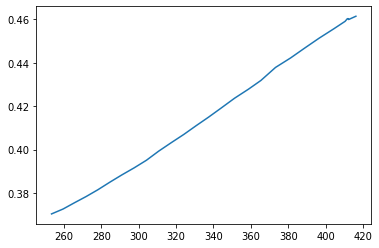

In [11]:
plt.plot(hot_T2, hot_CpdivT)
plt.show()

In [12]:
#ajuster un polynome aux données, dans notre cas une ligne droite.
#https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python
m,b=np.polyfit(hot_T2, hot_CpdivT, 1)

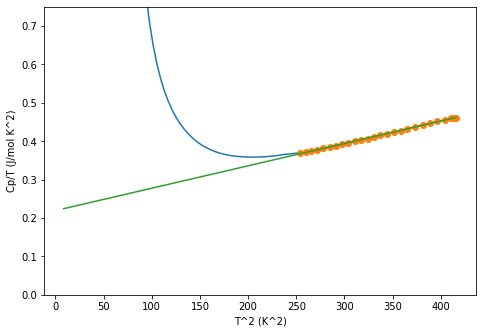

In [13]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(T2,CpdivT)
plt.plot(hot_T2, hot_CpdivT, 'o')
plt.plot(T2, m*T2 + b)
#Ajouter la designation des axes
#https://www.kite.com/python/answers/how-to-add-axis-labels-to-a-plot-in-matplotlib-in-python
plt.xlabel("T^2 (K^2)")
plt.ylabel("Cp/T (J/mol K^2)")
#Faire un Zoom sur les données en dessous de 0.75 J/mol K^2
#https://www.kite.com/python/answers/how-to-set-axis-ranges-in-matplotlib-in-python
plt.ylim(0,0.75)
plt.show()

In [14]:
# Ameliorer la graphique
# https://towardsdatascience.com/an-introduction-to-making-scientific-publication-plots-with-python-ea19dfa7f51e

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [15]:
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(6, 3))

<Figure size 432x216 with 0 Axes>

In [16]:
# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

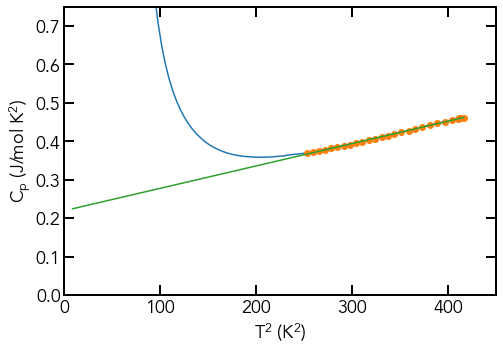

In [25]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
plt.plot(T2,CpdivT)
plt.plot(hot_T2, hot_CpdivT, 'o')
plt.plot(T2, m*T2 + b)
#Ajouter la designation des axes
#https://www.kite.com/python/answers/how-to-add-axis-labels-to-a-plot-in-matplotlib-in-python
plt.xlabel("$\mathregular{T^{2}}$ ($\mathregular{K^{2}}$)")
plt.ylabel("$\mathregular{C_{p}}$ (J/mol $\mathregular{K^{2}}$)")
#Faire un Zoom sur les données en dessous de 0.75 J/mol K^2
#https://www.kite.com/python/answers/how-to-set-axis-ranges-in-matplotlib-in-python
plt.ylim(0,0.75)
plt.xlim(0,450)
# Save figure
plt.savefig('Final_Plot.pdf', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>